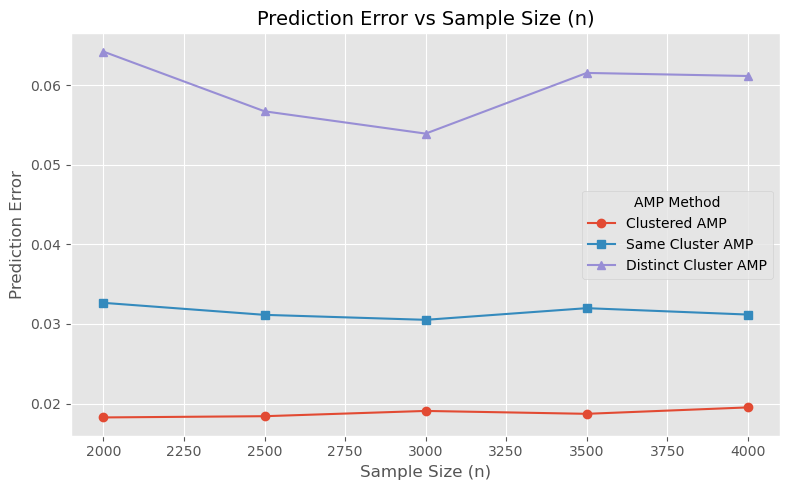

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import re

# === Setup paths ===
results_dir = "/home/sagnik/Research/Hierarchical_AMP/Results/predict_vary_n"
plot_dir = "/home/sagnik/Research/Hierarchical_AMP/Plots/predict_vary_n"
os.makedirs(plot_dir, exist_ok=True)

# === Load and combine CSV files ===
csv_files = sorted(glob.glob(os.path.join(results_dir, "predict_result_*.csv")))
records = []

for file in csv_files:
    match = re.search(r"predict_result_(\d+)\.csv", os.path.basename(file))
    if match:
        n_val = int(match.group(1))
        df = pd.read_csv(file)
        df["n"] = n_val
        records.append(df)

# Combine into single dataframe
combined_df = pd.concat(records, ignore_index=True)
combined_df = combined_df[["n", "pred_clustered", "pred_same_cluster", "pred_distinct_clusters"]]
combined_df = combined_df.sort_values("n")

# Save combined CSV
combined_csv_path = os.path.join(results_dir, "combined_prediction_results.csv")
combined_df.to_csv(combined_csv_path, index=False)

# === Plotting ===
plt.style.use("ggplot")
plt.figure(figsize=(8, 5))

plt.plot(combined_df["n"], combined_df["pred_clustered"], marker='o', label="Clustered AMP")
plt.plot(combined_df["n"], combined_df["pred_same_cluster"], marker='s', label="Same Cluster AMP")
plt.plot(combined_df["n"], combined_df["pred_distinct_clusters"], marker='^', label="Distinct Cluster AMP")

plt.title("Prediction Error vs Sample Size (n)", fontsize=14)
plt.xlabel("Sample Size (n)", fontsize=12)
plt.ylabel("Prediction Error", fontsize=12)
plt.legend(title="AMP Method", fontsize=10)
plt.grid(True)
plt.tight_layout()

# Save the plot
plot_path = os.path.join(plot_dir, "prediction_error_vs_n.png")
plt.savefig(plot_path, dpi=150)
plt.show()